In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\CLIENTE'

In [3]:
cd "E:\DATASETS\Anime Database\"

E:\DATASETS\Anime Database


In [4]:
df = pd.read_csv("Anime.csv")

In [5]:
pd.set_option('display.max_columns', 50)
df.head()

,ID,Title,Synonyms,Japanese,English,Synopsis,Type,Episodes,Status,Start_Aired,End_Aired,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,"AoT, SnK",進撃の巨人,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",TV,25.0,Finished Airing,"Apr 7, 2013","Sep 29, 2013",Spring 2013,Sundays at 0158 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,DN,デスノート,Death Note,"Brutal murders, petty thefts, and senseless vi...",TV,37.0,Finished Airing,"Oct 4, 2006","Jun 27, 2007",Fall 2006,Wednesdays at 0056 (JST),"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,"Hagane no Renkinjutsushi Fullmetal Alchemist, ...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,TV,64.0,Finished Airing,"Apr 5, 2009","Jul 4, 2010",Spring 2009,Sundays at 1700 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,"One Punch-Man, One-Punch Man, OPM",ワンパンマン,One Punch Man,The seemingly unimpressive Saitama has a rathe...,TV,12.0,Finished Airing,"Oct 5, 2015","Dec 21, 2015",Fall 2015,Mondays at 0105 (JST),"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,"S.A.O, SAO",ソードアート・オンライン,Sword Art Online,Ever since the release of the innovative Nerve...,TV,25.0,Finished Airing,"Jul 8, 2012","Dec 23, 2012",Summer 2012,Sundays at 0000 (JST),"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [6]:
df.shape

(21460, 28)

##### Counting Nan values

In [7]:
df.isna().sum()
## MV == Missing Values
## Epsiodes the MV can be replaced by the average of episodes, which is 12 by season
## Duration_minutes he MV can be replaced by the average Duration which is 23 minutes
## Unfortunatebly score have many MV, so is possible that those Animes weren't popular, but getting rid of
## so many unpopular animes can baised our dataset, hence our model. But scoring them with the average can also be a bad idea
## and once again it can bias our model. Too much data is missing in that particular column, probably the best soulition is 
## just to drop it from the dataset. Same with Scored_users column
## Ranked, we can rank and clip the MV as the worst ranked animes.

ID                     0
Title                  0
Synonyms               0
Japanese               0
English                0
Synopsis               0
Type                   0
Episodes             547
Status                 0
Start_Aired            0
End_Aired              0
Premiered              0
Broadcast              0
Producers              0
Licensors              0
Studios                0
Source                 0
Genres                 0
Themes                 0
Demographics           0
Duration_Minutes     599
Rating                 0
Score               6898
Scored_Users        6898
Ranked              1924
Popularity             0
Members                0
Favorites              0
dtype: int64

In [8]:
df.Title[df['Score'].isna()]
## So seeing this I realized that the animes with MV on the score column are Animes that haven't been aired yet,
## or havne't finished yet. 
### But they've been announced or are being aired but aren't finished
#### So is safe and fair to 

362                                    Chainsaw Man
813                              Mob Psycho 100 III
833            Tate no Yuusha no Nariagari Season 3
890                             Spy x Family Part 2
915                Boku no Hero Academia 6th Season
                            ...                    
21455      Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo
21456    Xiao Gongzhu Ai Wei La Yu Shenmi Wangguo 2
21457                       Yongzhe Chuang Mo Cheng
21458               Yu Shen Chuan: Wangzhe Shaonian
21459                                 Konglong Wang
Name: Title, Length: 6898, dtype: object

In [9]:
list(df.Title[df['Score'].isna()])
## I covnert the series to list to see all the data
### I can confirm that those animes are being aired but not finished or haven't even been aired yet just announced

['Chainsaw Man',
 'Mob Psycho 100 III',
 'Tate no Yuusha no Nariagari Season 3',
 'Spy x Family Part 2',
 'Boku no Hero Academia 6th Season',
 'Shingeki no Kyojin: The Final Season - Kanketsu-hen',
 'Bleach: Sennen Kessen-hen',
 'Goblin Slayer 2nd Season',
 'Vinland Saga Season 2',
 'Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e Kayou II',
 'Dr. Stone: New World',
 'Fumetsu no Anata e 2nd Season',
 'Kono Subarashii Sekai ni Shukufuku wo! 3',
 'Ijiranaide, Nagatoro-san 2nd Attack',
 'Kimetsu no Yaiba: Katanakaji no Sato-hen',
 'Black Clover Movie',
 'Uzaki-chan wa Asobitai! Double',
 'Blue Lock',
 'Tonikaku Kawaii 2nd Season',
 'Tokyo Revengers: Seiya Kessen-hen',
 'Itai no wa Iya nano de Bougyoryoku ni Kyokufuri Shitai to Omoimasu. II',
 'Bungou Stray Dogs 4th Season',
 'Youjo Senki II',
 'Tensei shitara Slime Datta Ken Movie: Guren no Kizuna-hen',
 'Mushoku Tensei: Isekai Ittara Honki Dasu 2nd Season',
 'Jujutsu Kaisen 2nd Season',

In [10]:
## So is safe to drop those Nan's
df = df.dropna(subset=["Score"])

In [11]:
df.shape

(14562, 28)

In [12]:
df.isna().sum()
## Only left 3 more features to work with their Nan's.

ID                     0
Title                  0
Synonyms               0
Japanese               0
English                0
Synopsis               0
Type                   0
Episodes              78
Status                 0
Start_Aired            0
End_Aired              0
Premiered              0
Broadcast              0
Producers              0
Licensors              0
Studios                0
Source                 0
Genres                 0
Themes                 0
Demographics           0
Duration_Minutes      14
Rating                 0
Score                  0
Scored_Users           0
Ranked              1461
Popularity             0
Members                0
Favorites              0
dtype: int64

In [13]:
### It is onlt 14 nan's on Duration_minutes so it won't ruin the dataset. Tho it is safe to drop them too

df['Duration_Minutes'].fillna((df['Duration_Minutes'].mean()), inplace=True)

In [14]:
values = {"Episodes": 12}
df = df.fillna(value=values)

In [15]:
# Clipping aint a good idea it cuz o kurtosis, so you can fillnan with a sequence of values
df['Ranked'].sort_values(ascending=False)


3284     131202.0
4314     131192.0
6955     131172.0
2373     131152.0
8302     131142.0
           ...   
13843         NaN
13947         NaN
14076         NaN
14394         NaN
14983         NaN
Name: Ranked, Length: 14562, dtype: float64

In [16]:
131202+1461

132663

In [17]:
lista=[]
for i in range(131202,132663):
    lista.append(i)

In [18]:
len(lista)
## Seeing if the len of lista is the same as the len of MV from the column

1461

In [19]:
df2 = df.copy(deep=True)

In [20]:
### TO FILL NAN VALUES WITH A SEQUENCE OF NUMBERS
###  https://stackoverflow.com/questions/54201859/is-there-a-python-function-to-fill-missing-data-with-consecutive-value
nulls = df2['Ranked'].isnull()
df2['Ranked'] = df2['Ranked'].fillna(pd.Series(lista, index=nulls[nulls].index))

In [21]:
df2['Ranked'].sort_values(ascending=True)

2            12.0
260          22.0
336          32.0
12           42.0
27           52.0
           ...   
13843    132658.0
13947    132659.0
14076    132660.0
14394    132661.0
14983    132662.0
Name: Ranked, Length: 14562, dtype: float64

In [22]:
df2 = df2.drop(["Synonyms","Japanese","Type","Status","Start_Aired","End_Aired","Broadcast"], axis=1)

In [23]:
df2.head()

,ID,Title,English,Synopsis,Episodes,Premiered,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,Shingeki no Kyojin,Attack on Titan,"Centuries ago, mankind was slaughtered to near...",25.0,Spring 2013,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,Death Note,Death Note,"Brutal murders, petty thefts, and senseless vi...",37.0,Fall 2006,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
2,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist Brotherhood,After a horrific alchemy experiment goes wrong...,64.0,Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
3,30276,One Punch Man,One Punch Man,The seemingly unimpressive Saitama has a rathe...,12.0,Fall 2015,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,24.0,R - 17+ (violence & profanity),8.511,19066.0,1112.0,4,2879907,59651
4,11757,Sword Art Online,Sword Art Online,Ever since the release of the innovative Nerve...,25.0,Summer 2012,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,7.201,990254.0,29562.0,5,2813565,64997


In [24]:
### There are many Unknown so we have to see a way to work with that

In [25]:
df2.columns

Index(['ID', 'Title', 'English', 'Synopsis', 'Episodes', 'Premiered',
       'Producers', 'Licensors', 'Studios', 'Source', 'Genres', 'Themes',
       'Demographics', 'Duration_Minutes', 'Rating', 'Score', 'Scored_Users',
       'Ranked', 'Popularity', 'Members', 'Favorites'],
      dtype='object')

In [26]:
L = ['Title']
for x in L:
    print(df2[x].unique())

# There are not duplicated values

['Shingeki no Kyojin' 'Death Note' 'Fullmetal Alchemist: Brotherhood' ...
 'Greenlights Serenade' 'Heart Beat (2019)' 'UnAlive']


In [27]:
df2["Title"] = df2["Title"].str.lower()
df2["Synopsis"] = df2["Synopsis"].str.lower()

In [28]:
df2.loc[30:40,:]

,ID,Title,English,Synopsis,Episodes,Premiered,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
30,23755,nanatsu no taizai,The Seven Deadly Sins,in a world similar to the european middle ages...,24.0,Fall 2014,"Aniplex, Dentsu, Mainichi Broadcasting System,...",Funimation,A-1 Pictures,Manga,"Action, Adventure, Fantasy",Unknown,Shounen,24.0,PG-13 - Teens 13 or older,7.701,236192.0,11002.0,31,1878826,18941
31,10620,mirai nikki (tv),The Future Diary,yukiteru amano is a shy middle schooler who re...,26.0,Fall 2011,"Lantis, Kadokawa Shoten, Rakuonsha, Kadokawa P...",Funimation,asread.,Manga,"Action, Supernatural, Suspense","Gore, High Stakes Game, Psychological, Survival",Shounen,23.0,R+ - Mild Nudity,7.441,136582.0,18772.0,32,1868295,29557
32,21881,sword art online ii,Sword Art Online II,"a year after escaping sword art online, kazuto...",24.0,Summer 2014,"Aniplex, Genco, ASCII Media Works, Bandai Namc...",Aniplex of America,A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",Unknown,23.0,PG-13 - Teens 13 or older,6.701,235658.0,53112.0,33,1814086,9076
33,32182,mob psycho 100,Mob Psycho 100,"eighth-grader shigeo ""mob"" kageyama has tapped...",12.0,Summer 2016,"Warner Bros. Japan, KlockWorx, BS Fuji, Hakuho...","Funimation, Crunchyroll",Bones,Web manga,"Action, Comedy, Supernatural",Super Power,Unknown,24.0,PG-13 - Teens 13 or older,8.481,106217.0,1252.0,34,1794981,40814
34,24833,ansatsu kyoushitsu,Assassination Classroom,tucked in the mountains near the elite kunugig...,22.0,Winter 2015,"Dentsu, Studio Hibari, Fuji TV, DAX Production...",Funimation,Lerche,Manga,"Action, Comedy",School,Shounen,23.0,PG-13 - Teens 13 or older,8.101,66516.0,4342.0,35,1792836,27493
35,9919,ao no exorcist,Blue Exorcist,humans and demons are two sides of the same co...,25.0,Spring 2011,"Aniplex, Dentsu, Mainichi Broadcasting System,...",Aniplex of America,A-1 Pictures,Manga,"Action, Fantasy","Mythology, School",Shounen,24.0,PG-13 - Teens 13 or older,7.511,77132.0,16402.0,36,1774322,16253
36,20583,haikyuu!!,Haikyu!!,"ever since having witnessed the ""little giant""...",25.0,Spring 2014,"Dentsu, Mainichi Broadcasting System, Movic, T...",Sentai Filmworks,Production I.G,Manga,Sports,"School, Team Sports",Shounen,24.0,PG-13 - Teens 13 or older,8.451,98221.0,1382.0,37,1751173,68055
37,30831,kono subarashii sekai ni shukufuku wo!,KonoSuba God's Blessing on This Wonderful World!,after dying a laughable and pathetic death on ...,10.0,Winter 2016,"Half H.P Studio, Nippon Columbia, KlockWorx, S...","Discotek Media, Crunchyroll",Studio Deen,Light novel,"Adventure, Comedy, Fantasy","Isekai, Parody, Reincarnation",Unknown,23.0,PG-13 - Teens 13 or older,8.121,147252.0,4152.0,38,1747536,41789
38,37779,yakusoku no neverland,The Promised Neverland,"surrounded by a forest and a gated entrance, t...",12.0,Winter 2019,"Aniplex, Dentsu, Fuji TV, Shueisha, CA-Cygames...",Aniplex of America,CloverWorks,Manga,"Mystery, Sci-Fi, Suspense","Psychological, Survival",Shounen,22.0,R - 17+ (violence & profanity),8.531,148074.0,1022.0,39,1746408,31501
39,269,bleach,Bleach,ichigo kurosaki is an ordinary high schooler—u...,366.0,Fall 2004,"TV Tokyo, Aniplex, Dentsu, TV Tokyo Music, Stu...",VIZ Media,Pierrot,Manga,"Action, Adventure, Fantasy",Unknown,Shounen,24.0,PG-13 - Teens 13 or older,7.881,997243.0,7332.0,40,1710380,62532


In [29]:
df2["Title"][1]

'death note'

In [30]:
#df2[['A','B']] = df2.Premiered.apply(lambda x: pd.Series(str(x).split(" ")))
#df2[['A','B']] = df2.Premiered.apply(lambda x: pd.Series(str(x).split(" ")))
#df2[['A','B']] = df2.Premiered.apply(lambda x: pd.Series(str(x).split(" ")))
#df2[['A','B']] = df2.Premiered.apply(lambda x: pd.Series(str(x).split(" ")))

In [31]:
df2.isna().sum()
## With so Many Nan values is better if we drop that column

ID                      0
Title                   0
English                 0
Synopsis                0
Episodes                0
Premiered               0
Producers               0
Licensors               0
Studios                 0
Source                  0
Genres                  0
Themes                  0
Demographics            0
Duration_Minutes        0
Rating                  0
Score                   0
Scored_Users            0
Ranked                  0
Popularity              0
Members                 0
Favorites               0
A                       0
B                   10331
dtype: int64

In [32]:
df.loc[df.Premiered == "Unknown","Premiered"]
## 10331 Unknown...
## It seems that the correct approach is to throw away the Premiered col

10       Unknown
18       Unknown
43       Unknown
87       Unknown
94       Unknown
          ...   
17720    Unknown
17737    Unknown
17820    Unknown
17857    Unknown
17988    Unknown
Name: Premiered, Length: 10331, dtype: object

In [33]:
df2 = df2.drop(["A","Premiered","B"], axis=1)

In [34]:
eru = list(df2["Favorites"].unique())

In [35]:
df2.head(2)

,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,16498,shingeki no kyojin,Attack on Titan,"centuries ago, mankind was slaughtered to near...",25.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R - 17+ (violence & profanity),8.531,519803.0,1002.0,1,3524109,155695
1,1535,death note,Death Note,"brutal murders, petty thefts, and senseless vi...",37.0,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701


In [36]:
eru

[155695,
 159701,
 207772,
 59651,
 64997,
 52169,
 71876,
 47433,
 83110,
 188649,
 83505,
 20123,
 175248,
 17147,
 46672,
 100796,
 101425,
 18914,
 78715,
 54069,
 80730,
 74093,
 31615,
 62373,
 177620,
 12713,
 46669,
 52595,
 26892,
 44620,
 18941,
 29557,
 9076,
 40814,
 27493,
 16253,
 68055,
 41789,
 31501,
 62532,
 31979,
 50285,
 73936,
 29322,
 10125,
 44383,
 72087,
 94328,
 26350,
 35716,
 53631,
 16379,
 42827,
 23156,
 8099,
 24984,
 36490,
 24750,
 35358,
 31780,
 73405,
 5878,
 29672,
 34121,
 21209,
 10908,
 22879,
 39684,
 23427,
 25363,
 11096,
 32436,
 9533,
 24879,
 11436,
 11247,
 26675,
 10070,
 29354,
 46837,
 21187,
 26918,
 29942,
 15241,
 16895,
 25351,
 16952,
 12067,
 25031,
 12724,
 39160,
 22936,
 50364,
 35509,
 24541,
 25827,
 6411,
 21475,
 18506,
 8143,
 16684,
 34244,
 19407,
 34035,
 16414,
 67296,
 28746,
 20047,
 21493,
 10522,
 11460,
 14750,
 19730,
 20612,
 17791,
 3028,
 3594,
 9988,
 31655,
 19629,
 3769,
 33061,
 15488,
 23742,
 24696,
 2

In [37]:
df2.shape

(14562, 20)

In [38]:
# df2.to_csv('AnimeDB.csv')

### Some EDA

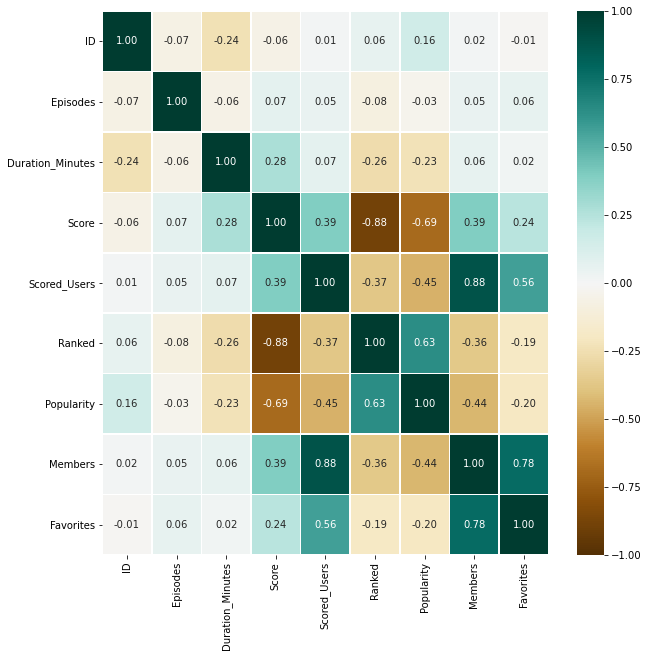

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
corr1   = df2.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)

#### Regarding Outliers

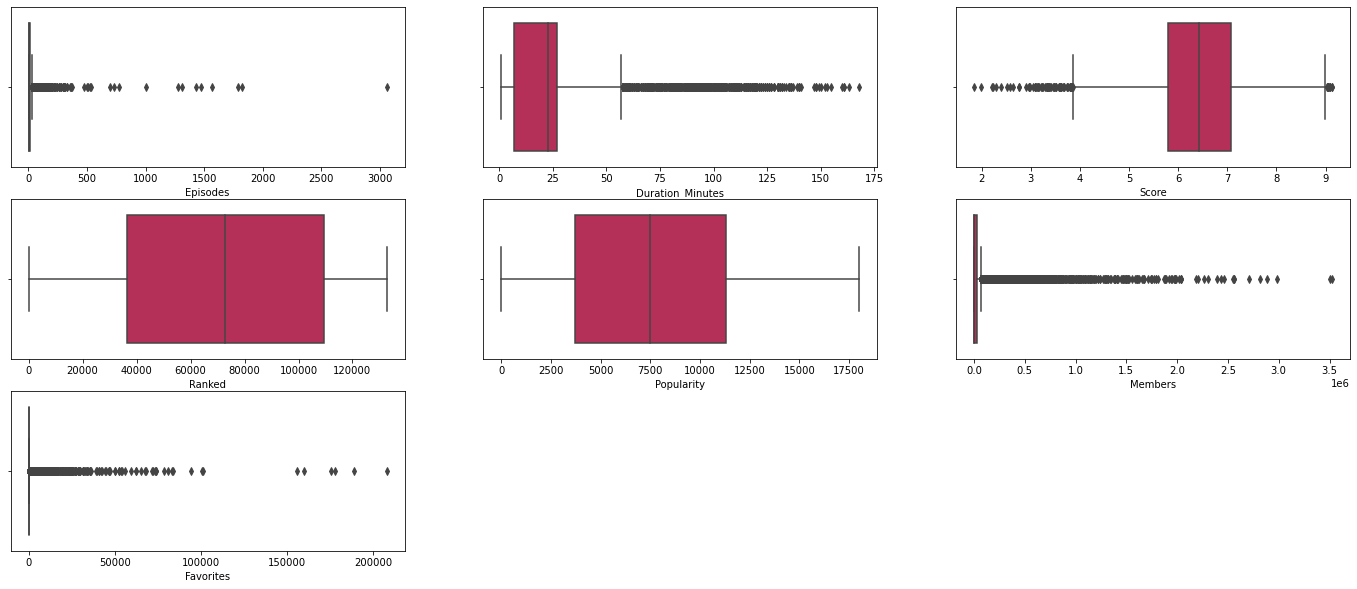

In [40]:
df_box_plot=df2[['Episodes', 'Duration_Minutes' ,'Score' ,'Ranked' ,'Popularity' ,'Members' ,'Favorites']]

i = 1
plt.figure(figsize=(24, 10))
for feature in df_box_plot.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_box_plot[feature], palette="rocket_r")
    i += 1

## We can se that the outliers shouldn't represent much of an issue if we Bin the features
## If we want to make a Sentiment Analysis we can use Popularity and/or Ranked due to the lack of outliers 
## and simplicity of the model. Score should be a great feature but we weould need to bin it or clip it 

In [41]:
df2.describe()
## To be fair data in Score, Ranked and Popularity are perfectly fine
## Those features can be used for the sentiment analysis

,ID,Episodes,Duration_Minutes,Score,Scored_Users,Ranked,Popularity,Members,Favorites
count,14562.000000,14562.000000,14562.000000,14562.000000,14562.000000,14562.000000,14562.000000,1.456200e+04,14562.000000
mean,20594.421165,11.559401,25.902461,6.421724,26507.173809,72221.262464,7621.341505,5.722612e+04,676.756558
std,16126.674776,49.656754,25.050102,0.910469,84989.501599,41075.427158,4555.862784,1.873302e+05,5340.983416
min,1.000000,1.000000,1.000000,1.841000,101.000000,12.000000,1.000000,1.720000e+02,0.000000
25%,4494.250000,1.000000,7.000000,5.791000,418.000000,36434.500000,3713.000000,1.256000e+03,1.000000
50%,18062.000000,2.000000,23.000000,6.431000,1876.500000,72867.000000,7489.500000,5.137500e+03,8.000000
75%,35734.750000,12.000000,27.000000,7.081000,11406.500000,109339.500000,11319.000000,2.777175e+04,61.000000
max,53075.000000,3057.000000,168.000000,9.131000,997243.000000,132662.000000,18014.000000,3.524109e+06,207772.000000


In [42]:
df3 = df2.copy()

In [43]:
df3.sort_values(by='Favorites',ascending=False)

,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
2,5114,fullmetal alchemist: brotherhood,Fullmetal Alchemist Brotherhood,after a horrific alchemy experiment goes wrong...,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R - 17+ (violence & profanity),9.131,900398.0,12.0,3,2978455,207772
9,11061,hunter x hunter (2011),Hunter x Hunter,hunters devote themselves to accomplishing haz...,148.0,"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,"Action, Adventure, Fantasy",Unknown,Shounen,23.0,PG-13 - Teens 13 or older,9.041,538454.0,92.0,10,2464157,188649
24,21,one piece,One Piece,"gol d. roger was known as the ""pirate king,"" t...",12.0,"Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,Manga,"Action, Adventure, Fantasy",Unknown,Shounen,24.0,PG-13 - Teens 13 or older,8.671,121979.0,582.0,25,1967217,177620
12,9253,steins;gate,Steins;Gate,eccentric scientist rintarou okabe has a never...,24.0,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Unknown,24.0,PG-13 - Teens 13 or older,9.081,268716.0,42.0,13,2299690,175248
1,1535,death note,Death Note,"brutal murders, petty thefts, and senseless vi...",37.0,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R - 17+ (violence & profanity),8.621,485487.0,732.0,2,3504535,159701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12655,19171,sanjougattai transformers go!,Unknown,bundled on dvds with shogakukan's terebi-kun (...,10.0,Unknown,Unknown,Tatsunoko Production,Original,Sci-Fi,Mecha,Shounen,13.0,PG - Children,5.101,260.0,122132.0,12669,778,0
12658,34762,chen-kuro gakuen,Unknown,each of the three chain chronicle: haecceitas ...,3.0,Unknown,Unknown,Unknown,Game,Comedy,"Parody, School",Unknown,3.0,G - All Ages,5.481,128.0,111812.0,12672,778,0
12659,10901,aoi hitomi no onnanoko no ohanashi,Unknown,the story is set in a village in the southern ...,1.0,TV Asahi,Unknown,Shin-Ei Animation,Novel,Drama,Historical,Unknown,44.0,PG - Children,6.311,184.0,74312.0,12673,777,0
12660,39793,ever green never end,Ever green Never end,official music video for the song ever green n...,1.0,Unknown,Unknown,Unknown,Original,Unknown,Music,Unknown,2.0,G - All Ages,5.691,424.0,104182.0,12674,777,0


In [44]:
df3.columns

Index(['ID', 'Title', 'English', 'Synopsis', 'Episodes', 'Producers',
       'Licensors', 'Studios', 'Source', 'Genres', 'Themes', 'Demographics',
       'Duration_Minutes', 'Rating', 'Score', 'Scored_Users', 'Ranked',
       'Popularity', 'Members', 'Favorites'],
      dtype='object')

In [48]:
df2["English"].value_counts()

Unknown                                                                            7214
Cyborg 009                                                                            4
Big Windup!                                                                           3
Digimon Fusion                                                                        3
The Heroic Legend of Arslan                                                           3
                                                                                   ... 
Kanokon The Girl Who Cried Fox                                                        1
Superdimensional Romanesque Samy Missing 99                                           1
Solo A Star Wars Story                                                                1
Beyond the Boundary I'll Be Here - Past                                               1
The Ancient Magus' Bride The Boy from the West and the Knight of the Blue Storm       1
Name: English, Length: 7221, dty

In [49]:
df2["Title"].value_counts()

kikaider 01 the animation                           1
tsui no sora                                        1
hajimari wa kimi no sora                            1
pikmin short movies                                 1
s.cry.ed alteration i: tao                          1
                                                   ..
qin shi mingyue tebie pian: di zi jiang xi          1
ys: tenkuu no shinden - adol christine no bouken    1
ginga tansa 2100-nen: border planet                 1
aruhi no clamp gakuen tanteidan                     1
tokyo mew mew                                       1
Name: Title, Length: 14562, dtype: int64

In [50]:
L = ["Studios","Genres","Themes","Demographics","Source","Rating"]
for x in L:
    print(df2[x].value_counts())

Unknown                           3217
Toei Animation                     658
Sunrise                            492
J.C.Staff                          355
Madhouse                           319
                                  ... 
Steve N' Steven, Rockwell Eyes       1
Actas, TMS Entertainment             1
Anime R, Aubec                       1
Nostalook                            1
Pierrot, David Production            1
Name: Studios, Length: 1264, dtype: int64
Unknown                                              1492
Hentai                                               1134
Comedy                                               1111
Fantasy                                               404
Comedy, Slice of Life                                 399
                                                     ... 
Adventure, Fantasy, Romance, Hentai                     1
Action, Avant Garde, Fantasy, Romance, Sci-Fi           1
Action, Adventure, Fantasy, Sci-Fi, Slice of Life       1
Adventu

In [51]:
## Studios Keep the first only
## In genre I should only keep the first 3 genres
### Theme KEEP THE FIRST ONLY 
## Many UNKNOWN Vs in DEMOGRAPHICS maybe we shouldn't consider that one
 ## Dont touch Source
    ## Dont Touch Rating
## Try to get rid of COMAS and weird stuff

### The Unknown Values are biasing my dataset, hence the similarity model will be BAD REALLY B A D

In [93]:
df4 = df3.copy()


dfStudios = df4['Studios'].str.split(',', expand = True)
dfGenres = df4['Genres'].str.split(',', expand = True)
dfThemes = df4['Themes'].str.split(',', expand = True)

In [94]:
dfStudios 
## Keep the first

,0,1,2,3,4,5,6,7,8,9
0,Wit Studio,None,None,None,None,None,None,None,None,None
1,Madhouse,None,None,None,None,None,None,None,None,None
2,Bones,None,None,None,None,None,None,None,None,None
3,Madhouse,None,None,None,None,None,None,None,None,None
4,A-1 Pictures,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
17720,Unknown,None,None,None,None,None,None,None,None,None
17737,Calf Studio,None,None,None,None,None,None,None,None,None
17820,Unknown,None,None,None,None,None,None,None,None,None
17857,Unknown,None,None,None,None,None,None,None,None,None


In [55]:
dfGenres
## Covnert NONES into Unknown
## Keep 2

,0,1,2,3,4,5,6,7,8
0,Action,Drama,None,None,None,None,None,None,None
1,Supernatural,Suspense,None,None,None,None,None,None,None
2,Action,Adventure,Drama,Fantasy,None,None,None,None,None
3,Action,Comedy,None,None,None,None,None,None,None
4,Action,Adventure,Fantasy,Romance,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
17720,Unknown,None,None,None,None,None,None,None,None
17737,Unknown,None,None,None,None,None,None,None,None
17820,Unknown,None,None,None,None,None,None,None,None
17857,Unknown,None,None,None,None,None,None,None,None


In [56]:
dfThemes
### Keep the first one

,0,1,2,3,4
0,Gore,Military,Survival,None,None
1,Psychological,None,None,None,None
2,Military,None,None,None,None
3,Parody,Super Power,None,None,None
4,Love Polygon,Video Game,None,None,None
...,...,...,...,...,...
17720,Music,None,None,None,None
17737,Music,None,None,None,None
17820,Music,None,None,None,None
17857,Idols (Female),Music,None,None,None


In [57]:
dfThemes[1].value_counts().sum()
## Too many none values to consider more than 1

3213

In [96]:
dfThemes[0].value_counts()

Unknown              5832
Music                1457
Mecha                 887
School                828
Historical            795
Harem                 360
Mythology             298
Parody                289
Adult Cast            285
Martial Arts          260
Super Power           229
Idols (Female)        206
Military              205
Mahou Shoujo          184
Detective             183
Psychological         169
CGDCT                 164
Isekai                157
Gag Humor             146
Strategy Game         143
Space                 131
Anthropomorphic       110
Team Sports           109
Gore                  102
Racing                 86
Iyashikei              84
Idols (Male)           82
Combat Sports          79
Video Game             65
Vampire                64
Love Polygon           60
Pets                   50
Workplace              49
Childcare              41
Otaku Culture          39
Educational            34
Time Travel            32
Samurai                31
Crossdressin

In [101]:
dfGenres[1].value_counts()
## Many Nones since col 2 and on, consider just 2 columns 0,1

 Adventure        1194
 Comedy           1193
 Fantasy          1179
 Sci-Fi            909
 Drama             864
 Romance           845
 Slice of Life     647
 Supernatural      333
 Mystery           242
 Hentai            174
 Sports            173
 Horror            172
 Ecchi             166
 Gourmet            52
 Girls Love         52
 Suspense           42
 Boys Love          22
 Avant Garde        17
 Erotica             3
 Award Winning       1
Name: 1, dtype: int64

In [108]:
dfGenres[0].value_counts()
## Many Nones since col 2 and on, consider just 2 columns 0,1

KeyError: 0

In [102]:
dfGenres = dfGenres[[0,1]]
dfThemes = dfThemes[[0]]
dfStudios = dfStudios[[0]]

In [103]:
dfGenres.rename(columns={ dfGenres.columns[0]: "Genre", dfGenres.columns[1]: "Genre2"}, inplace = True)
dfThemes.rename(columns={ dfThemes.columns[0]: "Theme"}, inplace = True)
dfStudios.rename(columns={ dfStudios.columns[0]: "Studio"}, inplace = True)

C:\Users\CLIENTE\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [62]:
dfThemes["Theme"]

0                  Gore
1         Psychological
2              Military
3                Parody
4          Love Polygon
              ...      
17720             Music
17737             Music
17820             Music
17857    Idols (Female)
17988    Idols (Female)
Name: Theme, Length: 14562, dtype: object

In [63]:
df2["Rating"]

0        R - 17+ (violence & profanity)
1        R - 17+ (violence & profanity)
2        R - 17+ (violence & profanity)
3        R - 17+ (violence & profanity)
4             PG-13 - Teens 13 or older
                      ...              
17720         PG-13 - Teens 13 or older
17737         PG-13 - Teens 13 or older
17820                      G - All Ages
17857         PG-13 - Teens 13 or older
17988         PG-13 - Teens 13 or older
Name: Rating, Length: 14562, dtype: object

In [109]:
### in dfThemes the first col has Unknown values but not Nan, so we convert the Unknown into Nan's to do some data engineering 
### to the nan values like you'll se we did with dfGenres["Genre2"], the same exact apporach to avoid much code that can confuse 
### us

dfThemes.loc[dfThemes.Theme == "Unknown", "Theme"] = np.nan

## In Rating we have an issue with None values, we'll change the None by Unknown
df4.loc[df4.Rating == "None", "Rating"] = "Unknown"

In [110]:
dfThemes.isna().sum()

Theme    5832
dtype: int64

In [111]:
x1 = dfGenres["Genre2"].value_counts()
x2 = dfThemes["Theme"].value_counts()

14562

In [112]:
# list(x1)

In [127]:
# list(x2)

In [114]:
lista2 = []
for x in x1:
    lista2.append(x/(14562-6282))    ## 6282  are Nan values
    
lista22 = []
for z in x2:
    lista22.append(z/(14562-5832))   ## 5832 are Unknown Values that we converted into Nan


In [115]:
# lista22

In [116]:
lista3 = []
for x in lista2:
    lista3.append(x*6282)
lista33 = []
for z in lista22:
    lista33.append(z*5832)

In [117]:
# lista33

In [73]:
#for i in range(len(lista3)):        
 #       if lista3[i] < 1:
  #          lista3[i] = 2
            
# That code can help us to not get values close to 0.
# You can use that code or just math.Ceil(numero) which is an easier approach

In [128]:
y = 0
for x in lista3:
    y = y + x
print(y)

## Se if the sum is correct ( the same as the MV or Nones)


6281.999999999998


In [129]:
w = 0
for h in lista33:
    w = w + h
print(w)


5831.999999999996


In [130]:
dfGenres["Genre2"]

0             Drama
1          Suspense
2         Adventure
3            Comedy
4         Adventure
            ...    
17720          None
17737          None
17820          None
17857          None
17988          None
Name: Genre2, Length: 14562, dtype: object

In [131]:
dfGenres["Genre2"].value_counts()

 Adventure        1194
 Comedy           1193
 Fantasy          1179
 Sci-Fi            909
 Drama             864
 Romance           845
 Slice of Life     647
 Supernatural      333
 Mystery           242
 Hentai            174
 Sports            173
 Horror            172
 Ecchi             166
 Gourmet            52
 Girls Love         52
 Suspense           42
 Boys Love          22
 Avant Garde        17
 Erotica             3
 Award Winning       1
Name: Genre2, dtype: int64

In [132]:
O_dfG = pd.DataFrame(dfGenres["Genre2"].value_counts())
O_dfT = pd.DataFrame(dfThemes["Theme"].value_counts())

In [134]:
# O_dfT

In [135]:
values_genres = list(O_dfG.index)
values_themes = list(O_dfT.index)

In [136]:
len(values_genres)
len(values_themes)

50

In [137]:
dfGenres.head()

,Genre,Genre2
0,Action,Drama
1,Supernatural,Suspense
2,Action,Adventure
3,Action,Comedy
4,Action,Adventure


In [138]:
import itertools
import math

### Now the next cell will be run two times. One to create the AnimeDB and the other to create the AnimeDB2
### That in order to experiment with two different approaches

In [139]:

for x, limite in zip(values_genres, lista3): 
    values = {"Genre2": x}
    limite = limite * 0.1
    limite = math.ceil(limite)
    dfGenres = dfGenres.fillna(value=values, limit=limite)

    
for k, lim in zip(values_themes, lista33): 
    values = {"Theme": k}
    lim = lim * 0.1
    lim = math.ceil(lim)
    dfThemes = dfThemes.fillna(value=values, limit=lim)
    
    
# On the  AnimeDB.csv we use "limite = limite * 0.7" to fill Unknown (that were turned into Nan) 
## as Categorical from Genre and Theme proportionally. 

# On the  AnimeDB2.csv we use "limite = limite * 0.1" to do the same. And we are going to drop
## many of those Unknown (nan) values that hold little to non value for the Project (as I explain further).

In [141]:
print(dfGenres["Genre2"].value_counts().sum())
print(dfThemes["Theme"].value_counts().sum())

8920
9341


In [144]:
print(dfGenres["Genre2"].isna().sum())
print(dfThemes["Theme"].isna().sum())

5642
5221


### Now, on the first AnimeDB we use the code below. But to AnimeDB2 we won't fill ALL "na's" with Unknown, 
### instead we are going to fill just a small percentage of them, and dump the restttt

In [181]:
### This code is for AnimeDB
# values = {"Genre2": "Unknown"}


# dfGenres = dfGenres.fillna(value=values)
# dfGenres["Genre2"].value_counts()

### This code is for AnimeDB2

values = {"Genre2": "Unknown"}

dfGenres = dfGenres.fillna(value=values)
dfGenres["Genre2"].value_counts()

Unknown           5642
 Adventure        1285
 Comedy           1284
 Fantasy          1269
 Sci-Fi            978
 Drama             930
 Romance           910
 Slice of Life     697
 Supernatural      359
 Mystery           261
 Hentai            188
 Sports            187
 Horror            186
 Ecchi             179
 Girls Love         56
 Gourmet            56
 Suspense           46
 Boys Love          24
 Avant Garde        19
 Erotica             4
 Award Winning       2
Name: Genre2, dtype: int64

In [182]:
### This code is for AnimeDB

#  values2 = {"Theme": "Unknown"}

#  dfThemes = dfThemes.fillna(value=values2)
#  dfThemes["Theme"].value_counts()

### This code is for AnimeDB2

values2 = {"Theme": "Unknown"}

dfThemes = dfThemes.fillna(value=values2)
dfThemes["Theme"].value_counts()

Unknown              5221
Music                1555
Mecha                 947
School                884
Historical            849
Harem                 385
Mythology             318
Parody                309
Adult Cast            305
Martial Arts          278
Super Power           245
Idols (Female)        220
Military              219
Mahou Shoujo          197
Detective             196
Psychological         181
CGDCT                 175
Isekai                168
Gag Humor             156
Strategy Game         153
Space                 140
Anthropomorphic       118
Team Sports           117
Gore                  109
Racing                 92
Iyashikei              90
Idols (Male)           88
Combat Sports          85
Video Game             70
Vampire                69
Love Polygon           65
Pets                   54
Workplace              53
Childcare              44
Otaku Culture          42
Educational            37
Time Travel            35
Samurai                34
Crossdressin

In [399]:
print(dfGenres.loc[dfGenres.Genre == "Unknown", "Genre"].value_counts()) 
print("------------------------")
print(dfGenres.loc[dfGenres.Genre2 == "Unknown", "Genre2"].value_counts())
print("------------------------")
print(dfThemes.loc[dfThemes.Theme == "Unknown", "Theme"].value_counts())
print("------------------------")
print(df4.loc[df4.Rating == "Unknown", "Rating"].value_counts())
print("------------------------")
print(df4.loc[df4.Title == "Unknown", "Title"].value_counts())
print("------------------------")
print(df4.loc[df4.Synopsis == "unknown", "Synopsis"].value_counts())

Unknown    1492
Name: Genre, dtype: int64
------------------------
Unknown    5642
Name: Genre2, dtype: int64
------------------------
Unknown    5221
Name: Theme, dtype: int64
------------------------
Unknown    97
Name: Rating, dtype: int64
------------------------
Series([], Name: Title, dtype: int64)
------------------------
unknown    417
Name: Synopsis, dtype: int64


In [269]:
#df4.shape

14562 -1492 +200

13270

In [184]:
#df4.loc[df4.Synopsis == "Unknown", "Synopsis"].value_counts()

# print(df4["Synopsis"].value_counts())

# df.loc[df.Synopsis == "Unknown", "Synopsis"].value_counts()

In [185]:
df4 = pd.concat([dfGenres,dfThemes,dfStudios,df2],axis = 1)

df4['Rating'] = df4['Rating'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df4['Genre'] = df4['Genre'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df4['Genre2'] = df4['Genre2'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df4['Theme'] = df4['Theme'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df4['Studio'] = df4['Studio'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df4['Title'] = df4['Title'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()


df4['Rating'] = df4['Rating'].str.replace('\d+', '', regex=True).str.strip()
df4['Genre'] = df4['Genre'].str.replace('\d+', '', regex=True).str.strip()
df4['Genre2'] = df4['Genre2'].str.replace('\d+', '', regex=True).str.strip()
df4['Theme'] = df4['Theme'].str.replace('\d+', '', regex=True).str.strip()
df4['Studio'] = df4['Studio'].str.replace('\d+', '', regex=True).str.strip()
df4['Title'] = df4['Title'].str.replace('\d+', '', regex=True).str.strip()


df4['Synopsis'] = df4['Synopsis'].str.replace('\d+', ' ', regex=True).str.strip()
df4['Synopsis'] = df4['Synopsis'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()

In [283]:
## df5 = df4.sort_values(by='Genre',ascending=True)  # This one is sorting by Genre to get rid of Unknowns
##            # But it seems that first we can separate the good data form the bad by column DURATION__MINUTES

# df4.loc[df4.Duration_Minutes == 11]
# df4.loc[df4.Title == "isekai quartet"].head(24)

## FIRST WE DROP BY DURATION_MINUTE. THEN WE DROP BY GENRE
df4.loc[df4.Duration_Minutes < 10 , "Duration_Minutes"].value_counts().sum()

## We drop all the with < 10 min duration, becuz they are usually comericals, non-animes or music videos.

3949

In [407]:
df5 = df4.sort_values(by='Duration_Minutes',ascending=False)

In [408]:
df5.tail(50)
## As we can see by synopsis and using internet, despite Genre being UNKNOWN and HAVING a Theme, 
# the animes are no more than propagandas or music videos, which hold no value for the recommendation system 
## HENCE IS SAFE TO DROP

,Genre,Genre2,Theme,Studio,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
13028,Action,Unknown,Mythology,Studio C,33366,toukiden,Unknown,promotional anime for koei tecmo game toukiden...,3.0,Unknown,Unknown,Studio 4°C,Game,Action,Mythology,Unknown,1.0,PG Teens or older,5.411,224.0,114202.0,13043,688,0
13018,Fantasy,Unknown,Music,Unknown,22415,aoi heya,Blue Room,a short pan view across a room is not as simpl...,1.0,Unknown,Unknown,Unknown,Original,Fantasy,Music,Unknown,1.0,G All Ages,4.451,379.0,129332.0,13032,691,0
15862,Fantasy,Unknown,Strategy Game,Unknown,36638,tenkyuu no arculs,"Celestial ""Arculs""",the animated opening for square enix s tenkyuu...,1.0,5pb.,Unknown,Unknown,Game,Fantasy,Strategy Game,Unknown,1.0,G All Ages,5.471,122.0,112242.0,15886,306,0
13050,Unknown,Unknown,Music,Unknown,25293,futago no mahoutsukai lico to gli,The Wizard of twins LICO & GLI,glico the prominent food manufacturer best kn...,4.0,Unknown,Unknown,Unknown,Original,Unknown,Music,Unknown,1.0,G All Ages,5.321,168.0,116972.0,13067,681,1
11356,Fantasy,Unknown,Unknown,Unknown,39415,donbei x kemurikusa,Unknown,a collaboration between kemurikusa s tv series...,1.0,Unknown,Unknown,Unknown,Original,Fantasy,Unknown,Unknown,1.0,G All Ages,5.381,432.0,115152.0,11366,1239,1
11410,Action,Unknown,Unknown,Unknown,6833,ninjutsu hinotama kozou edo no maki,Ninja Fireball in Edo,a short story about a young ninja,1.0,Unknown,Unknown,Unknown,Original,Action,Unknown,Unknown,1.0,G All Ages,4.001,670.0,130412.0,11421,1212,0
13057,Unknown,Unknown,Unknown,Unknown,31831,fantasy,Unknown,short animation by komazaki tomomi,1.0,Unknown,Unknown,Unknown,Original,Unknown,Unknown,Unknown,1.0,PG Teens or older,4.881,391.0,125582.0,13071,680,1
11314,Unknown,Unknown,School,Unknown,28963,nekota no koto ga kininatte shikatanai,Unknown,an anime adaptation of the nekota no koto ga k...,1.0,Unknown,Unknown,Unknown,Manga,Unknown,School,Shoujo,1.0,G All Ages,5.991,334.0,91202.0,11326,1254,2
15887,Fantasy,Unknown,Unknown,Unknown,37546,jirijiri moyou no ryuuryuu tenten,Unknown,a relaxing anime showing a convenience store a...,1.0,Unknown,Unknown,Unknown,Original,Fantasy,Unknown,Unknown,1.0,G All Ages,5.661,143.0,105612.0,15911,305,0
4279,Comedy,Unknown,Unknown,Studio PuYUKAI,36683,overlord movie manner movie,Unknown,a theater manners short bundled with the recap...,1.0,Unknown,Unknown,Studio PuYUKAI,Light novel,Comedy,Unknown,Unknown,1.0,G All Ages,6.891,5674.0,43602.0,4284,20096,23


In [409]:
df6 = df5.iloc[:10613,:]

In [410]:
df6.shape

(10613, 24)

In [411]:
df6.tail(2)

,Genre,Genre2,Theme,Studio,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
13205,Adventure,Horror,Unknown,Unknown,8182,bouken shounen shadar,Adventure Boy Shadar,when earth is threatened by the invading ghost...,156.0,Nihon Hoso Eigasha,Unknown,Unknown,Unknown,"Adventure, Horror",Unknown,Unknown,10.0,PG Teens or older,6.081,143.0,86502.0,13221,644,1
1784,Action,Adventure,Military,Pierrot,32365,boruto naruto the movie naruto ga hokage ni...,Boruto Naruto the Movie - The Day Naruto Becam...,bundled with the limited edition of blu ray dv...,1.0,Unknown,VIZ Media,Pierrot,Original,"Action, Adventure, Fantasy",Unknown,Shounen,10.0,PG Teens or older,7.351,57776.0,22112.0,1785,101944,138


In [412]:
### Check how many Unknown values are on  "  Genre, Genre2 and Theme  " (recall that they represent the majority of unknonws)

print(df6.loc[df6.Theme == "Unknown", "Theme"].value_counts()) 


Unknown    3773
Name: Theme, dtype: int64


##### I can say that a good apporach is to change the unknown values by "" (nothing) 

In [425]:
"""
df6['Genre'] = df6['Genre'].str.replace('Unknown', '', regex=True).str.strip()
df6['Genre2'] = df6['Genre2'].str.replace('Unknown', '', regex=True).str.strip()
df6['Theme'] = df6['Theme'].str.replace('Unknown', ' ', regex=True).str.strip()
df6['Rating'] = df6['Rating'].str.replace('Unknown', ' ', regex=True).str.strip()
df6['Synopsis'] = df6['Synopsis'].str.replace('unknown', ' ', regex=True).str.strip() 
"""

df6['Theme'] = df6['Theme'].str.replace('Unknown', 'ZZZZ', regex=True).str.strip()

In [414]:
print(df6.loc[df6.Genre == "Unknown", "Genre"].value_counts()) 
print("------------------------")
print(df6.loc[df6.Genre2 == "Unknown", "Genre2"].value_counts())
print("------------------------")
print(df6.loc[df6.Theme == "Unknown", "Theme"].value_counts())
print("------------------------")
print(df6.loc[df6.Rating == "Unknown", "Rating"].value_counts())
print("------------------------")
print(df6.loc[df6.Title == "Unknown", "Title"].value_counts())
print("------------------------")
print(df6.loc[df6.Synopsis == "unknown", "Synopsis"].value_counts())

Unknown    405
Name: Genre, dtype: int64
------------------------
Unknown    3008
Name: Genre2, dtype: int64
------------------------
Unknown    3773
Name: Theme, dtype: int64
------------------------
Unknown    77
Name: Rating, dtype: int64
------------------------
Series([], Name: Title, dtype: int64)
------------------------
unknown    300
Name: Synopsis, dtype: int64


In [428]:
df6 = df6.sort_values(by=['Genre','Genre2','Theme'],ascending=True)
df6.tail(90)

,Genre,Genre2,Theme,Studio,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
10211,Unknown,Unknown,Video Game,Studio Ghibli,31102,taiko no tatsujin shuunenkinen short animation,Unknown,toshio suzuki and studio ghibli produced the s...,1.0,Unknown,Unknown,Studio Ghibli,Game,Unknown,Video Game,Unknown,33.0,G All Ages,5.231,791.0,119342.0,10223,1920,1
15627,Unknown,Unknown,ZZZZ,Unknown,29920,kobutori,Unknown,a short puppet animation movie by tadahito moc...,1.0,Unknown,Unknown,Unknown,Other,Unknown,Unknown,Unknown,20.0,G All Ages,5.351,121.0,116192.0,15650,323,0
14887,Unknown,Unknown,ZZZZ,Unknown,37468,oi pii tan,Unknown,a stop motion promotional video for oi pii tan...,1.0,Unknown,Unknown,Unknown,Manga,Unknown,Unknown,Josei,38.0,G All Ages,4.771,167.0,126992.0,14910,386,0
8670,Unknown,Unknown,ZZZZ,Khara,43751,ayanami rei hajimete no kuchibeni,"Ayanami Rei, First Lipstick",lipstick advertisement involving rei ayanami,1.0,Unknown,Unknown,Khara,Original,Unknown,Unknown,Unknown,20.0,G All Ages,5.731,1566.0,102372.0,8679,3334,8
10918,Unknown,Unknown,ZZZZ,Mushi Production,5476,fushigi na melmo,Marvelous Melmo,after nine year old melmo loses her mother in ...,26.0,Unknown,Unknown,"Mushi Production, Tezuka Productions",Manga,Unknown,Unknown,Shoujo,24.0,PG Children,6.101,331.0,85282.0,10930,1461,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,Unknown,Unknown,ZZZZ,Toei Animation,2947,ojamajo doremi sharp movie,Unknown,one day pop was out scavenging with hana and ...,1.0,Unknown,Unknown,Toei Animation,Unknown,Unknown,Unknown,"Kids, Shoujo",27.0,G All Ages,7.151,2055.0,32062.0,7700,4787,3
10928,Unknown,Unknown,ZZZZ,Kyoto Animation,39735,baja no studio baja no mita umi,Unknown,kyoto animation announced on saturday that it ...,1.0,Unknown,Unknown,Kyoto Animation,Original,Unknown,Unknown,Kids,27.0,G All Ages,6.751,652.0,50332.0,10940,1453,3
11173,Unknown,Unknown,ZZZZ,Sunrise,44041,sd gundam world heroes,SD GUNDAM WORLD HEROES,the balance of the worlds is maintained by her...,24.0,Unknown,Unknown,Sunrise,Original,Unknown,Unknown,Unknown,24.0,PG Children,5.691,365.0,103952.0,11184,1328,3
10852,Unknown,Unknown,ZZZZ,TMS Entertainment,8949,tottoko hamtarou ova hamuchanzu no takara sa...,Hamtaro Ham-Hams Ahoy!,as laura heads out to summer camp hamtaro and...,1.0,Shogakukan-Shueisha Productions,Unknown,TMS Entertainment,Unknown,Unknown,Unknown,Kids,44.0,PG Children,6.301,487.0,75132.0,10864,1507,1


In [429]:
df7 = df6.iloc[:10524,:]         ## Delete 89 with Unknown Values on genre,genre2,theme

In [430]:
df7.tail(5)

,Genre,Genre2,Theme,Studio,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
13830,Unknown,Unknown,Super Power,Unknown,9950,hulu xiongdi,Unknown,legend has it that two demons were jailed in t...,13.0,Unknown,Unknown,Unknown,Original,Unknown,Super Power,Unknown,10.0,PG Children,6.451,200.0,66972.0,13850,521,3
13544,Unknown,Unknown,Super Power,Unknown,10909,ultraman kids m sei no yukai na nakama,Unknown,unknown,1.0,Tsuburaya Productions,Unknown,Unknown,Other,Unknown,Super Power,Kids,25.0,PG Children,5.531,168.0,110002.0,13561,573,0
8124,Unknown,Unknown,Vampire,Toei Animation,3801,yami no teio kyuuketsuki dracula,Dracula Sovereign of the Damned,on a seemingly normal night in boston a satan...,1.0,Unknown,Unknown,Toei Animation,Other,Unknown,Vampire,Unknown,94.0,R violence profanity,3.671,2181.0,130642.0,8131,4129,4
3943,Unknown,Unknown,Vampire,Production I G,20919,diabolik lovers recap,Unknown,recap of episodes with new narrations,1.0,"Frontier Works, Idea Factory, Showgate",Sentai Filmworks,"Production I.G, Zexcs",Visual novel,Unknown,Vampire,Shoujo,15.0,PG Teens or older,5.411,11326.0,114152.0,3946,24336,43
10211,Unknown,Unknown,Video Game,Studio Ghibli,31102,taiko no tatsujin shuunenkinen short animation,Unknown,toshio suzuki and studio ghibli produced the s...,1.0,Unknown,Unknown,Studio Ghibli,Game,Unknown,Video Game,Unknown,33.0,G All Ages,5.231,791.0,119342.0,10223,1920,1


In [431]:
df7.to_csv('AnimeDB2.csv')

In [432]:
df7.Genre2.isna().sum()

0

In [1]:
#defe = pd.read_csv("Anime.csv")


In [2]:
#defe.Title.isna().sum()

In [3]:
#defe['Duration_Minutes'].fillna((df['Duration_Minutes'].mean()), inplace=True)

In [4]:
#defe["Duration_Minutes"].isna().sum()

In [5]:
#defe = defe.dropna(subset=["Score"])

In [6]:
#defe.loc[defe.Themes == "Unknown"].head(24)

In [7]:
#L = ['Title']
#for x in L:
 #   print(df7[x].unique())

In [8]:
#df7.loc[df7.Title == "isekai quartet"].head(24)#

In [9]:
#df7["Title"].value_counts()

In [10]:
#defe[defe.duplicated(['Title'])]

# IMPORTANT
## It seems like "Duration_Minutes" is a better metric to separate the quality data from useless data for a recomendation system

In [249]:
# df4.loc[df4.Source == "Picture book"]

In [187]:
L = ["Genre2","Genre","Rating","Theme","Studio"]
for x in L:
    print(df4[x].isna().sum())

0
0
0
0
0


In [90]:
df4.to_csv('AnimeDB.csv')

In [91]:
df4.head()

,Genre,Genre2,Theme,Studio,ID,Title,English,Synopsis,Episodes,Producers,Licensors,Studios,Source,Genres,Themes,Demographics,Duration_Minutes,Rating,Score,Scored_Users,Ranked,Popularity,Members,Favorites
0,Action,Drama,Gore,Wit Studio,16498,shingeki no kyojin,Attack on Titan,centuriesagomankindwasslaughteredtonearextinct...,25.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"Action, Drama","Gore, Military, Survival",Shounen,24.0,R violence profanity,8.531,519803.0,1002.0,1,3524109,155695
1,Supernatural,Suspense,Psychological,Madhouse,1535,death note,Death Note,brutalmurderspettytheftsandsenselessviolencepo...,37.0,"VAP, Konami, Ashi Productions, Nippon Televisi...",VIZ Media,Madhouse,Manga,"Supernatural, Suspense",Psychological,Shounen,23.0,R violence profanity,8.621,485487.0,732.0,2,3504535,159701
2,Action,Adventure,Military,Bones,5114,fullmetal alchemist brotherhood,Fullmetal Alchemist Brotherhood,afterahorrificalchemyexperimentgoeswronginthee...,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,24.0,R violence profanity,9.131,900398.0,12.0,3,2978455,207772
3,Action,Comedy,Parody,Madhouse,30276,one punch man,One Punch Man,theseeminglyunimpressivesaitamahasaratheruniqu...,12.0,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,"Action, Comedy","Parody, Super Power",Seinen,24.0,R violence profanity,8.511,19066.0,1112.0,4,2879907,59651
4,Action,Adventure,Love Polygon,A Pictures,11757,sword art online,Sword Art Online,eversincethereleaseoftheinnovativenervegeargam...,25.0,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,"Action, Adventure, Fantasy, Romance","Love Polygon, Video Game",Unknown,23.0,PG Teens or older,7.201,990254.0,29562.0,5,2813565,64997


In [92]:
L = ["Genre2","Genre","Rating","Theme","Studio","Title","Rating"]
for x in L:
    print(df4[x].value_counts())

Unknown          3132
Adventure        1647
Comedy           1646
Fantasy          1627
Sci Fi           1254
Drama            1192
Romance          1166
Slice of Life     893
Supernatural      460
Mystery           334
Hentai            241
Sports            239
Horror            238
Ecchi             229
Gourmet            72
Girls Love         72
Suspense           58
Boys Love          31
Avant Garde        24
Erotica             5
Award Winning       2
Name: Genre2, dtype: int64
Action           3671
Comedy           3291
Unknown          1492
Adventure        1341
Hentai           1134
Drama             976
Fantasy           638
Avant Garde       390
Slice of Life     340
Sci Fi            249
Romance           226
Sports            220
Mystery           131
Boys Love         124
Horror            116
Supernatural      113
Ecchi              51
Girls Love         26
Gourmet            21
Suspense            6
Award Winning       4
Erotica             2
Name: Genre, dtype: int64
P

## VERY IMPORTANT

As we've seen, the data has many Unknown values (at least the data we need to create a recommednation model). thats why we can say the data lacks of quality ("low quality dataset"). The Dataset though, is pretty good to do some data exploration on Anime like how many shows are meant to children if the industry is lead by a certain Studio, which animes are more popular, etc.
#### -------------------------------------------------------------------------------------
So I'll do two things here to see the best outcome. 
#### -------------------------------------------------------------------------------------
But before it it is REALLY IMPORTANT to explain this. Many UNKNOWN values according to what I've seen in the dataset are from animes that are not popular, or were meant to be propagandas or CD's for children (like those Cd's that teach english to kids or Redbull propagandas), also from animes that are pretty pretty bad or that they don't even look like animes, so it would be SAFE to simply get rid of them of most of them in order to create the model, other approach could be just randomizing the data like we did in the above cells, converting those Unknown values proportionally into values we know (adventure, fantasy, romance, idol, fights, etc) but to a lower scale in order to not bias, and oc also dropping the vast majority of Unknown values. That's why data engineering is so  important and why to understand the data you have in fron of your nose is so important in Data Science.
#### -------------------------------------------------------------------------------------
So in order to experiment with this, I'll run the model with many unknown values and converted unknown values (just the thing I did in the cells above) and see what the outcome is. I can say that the outcome is going to be pretty bad, but let's do it anyways. After that I'm going to improve the data engineering as I said before. 
#### So let's begin

In [ ]:
## studios, genrem, genre 2, theme, Source, Rating

In [ ]:
# df4[df4["Title"].eq("serial experiments lain").any(1)]
# df4.where(df4["Title"] == 'serial experiments lain')